In [44]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import random 
from proj1_helpers import *
import datetime
import math

In [66]:
def standardize(x):
 
    mean_x = np.mean(x, axis=0)
    x = x - mean_x
    std_x = np.std(x, axis=0)
    x = x / std_x
    return x, mean_x, std_x

data_path = "/Users/mac/Desktop/ML_course-master/projects/project1/train.csv"

y, x, ids = load_csv_data(data_path, sub_sample=False)
x, mean_x, std_x = standardize(x)

y = y.reshape(y.shape[0],1)

for n,i in enumerate(y):  #Change -1 into 1 to avoid negative losses
    if i==-1:
          y[n]=0

print("y.shape",y.shape)
print("x.shape",x.shape)

y.shape (250000, 1)
x.shape (250000, 30)


In [107]:
def compute_mse(y, tx, w):
    """compute the loss by mse."""
    e = y - tx.dot(w)
    mse = np.transpose(e).dot(e) / (2*len(e))
    return mse

def ridge_regression(y, tx, lambda_):

    w_ridge =  np.linalg.inv(np.transpose(tx).dot(tx) + lambda_*(2*len(y))*np.eye(tx.shape[1])).dot((np.transpose(tx))).dot(y)
    loss_ridge =  compute_mse(y,tx,w_ridge) + lambda_*np.transpose(w_ridge).dot(w_ridge)
    
    return w_ridge, loss_ridge

def build_k_indices(y, k_fold, seed):

    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)


def cross_validation_visualization(lambds, mse_tr, mse_te):

    plt.semilogx(lambds, mse_tr, marker=".", color='b', label='train error')
    plt.semilogx(lambds, mse_te, marker=".", color='r', label='test error')
    plt.xlabel("lambda")
    plt.ylabel("rmse")
    plt.title("cross validation (k_fold = 5): Ridge regression")
    plt.legend(loc=2)
    plt.grid(True)
    plt.savefig("cross_validation")
    

def cross_validation(y, x, k_indices, k, k_fold, lambda_):
    
    k_test = k_indices[k]
    
    L = len(k_test)
    N = y.shape[0]
    
    x_train_indice = np.array([]) #Initialisation of the training indices 
    
    for i in range(k_fold):           
        if i!=k:
            x_train_indice = np.concatenate((x_train_indice,k_indices[i])) #Concatenation of the array of training indices
            
        x_train_indice = list(map(int, x_train_indice)) #Concatenation of empty array with another array transforms the integers into floats.

    x_train = x[x_train_indice] #Build the matrices x_train, x_test, y_train and y_test
    x_test = x[k_test]
    y_train = np.array([y[i] for i in x_train_indice])
    y_test = np.array([y[i] for i in k_test])
    
    tx_train = np.c_[np.ones((N-L, 1)), x_train] #Include the offset
    tx_test = np.c_[np.ones((L, 1)), x_test]
    
    w_train, loss = ridge_regression(y_train, tx_train,lambda_)
    
    loss_tr = math.sqrt(2*loss)  #Compute MSE
    loss_te = math.sqrt(2*(compute_mse(y_test,tx_test,w_train) + lambda_*np.transpose(w_train).dot(w_train)))
    
    return loss_tr, loss_te

def cross_validation_demo():
    seed = 1
    k_fold = 5
    lambdas = np.logspace(-12, -5, 10)

    # split data in k fold
    
    k_indices = build_k_indices(y, k_fold, seed)
  
    # define lists to store the loss of training data and test data
    
    rmse_tr = []
    rmse_te = []
    rmse_tr_iter = [] 
    rmse_te_iter = []
    
    for lambda_ in lambdas:
        for k in range(k_fold):
            
            rmse_trk , rmse_tek = cross_validation(y,x,k_indices,k,k_fold,lambda_)
            
            rmse_tr_iter.append(rmse_trk) #Store the k_fold train and test losses
            rmse_te_iter.append(rmse_tek)
            
        rmse_tr.append(np.mean(rmse_tr_iter)) #Compute the mean and store in the final list 
        rmse_te.append(np.mean(rmse_te_iter))
        
        print("Current lambda = {i}".format(i=lambda_))
        
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

 

Current lambda = 1e-12
Current lambda = 5.994842503189421e-12
Current lambda = 3.5938136638046254e-11
Current lambda = 2.1544346900318867e-10
Current lambda = 1.2915496650148826e-09
Current lambda = 7.742636826811278e-09
Current lambda = 4.641588833612782e-08
Current lambda = 2.782559402207126e-07
Current lambda = 1.6681005372000591e-06
Current lambda = 1e-05


<IPython.core.display.Javascript object>


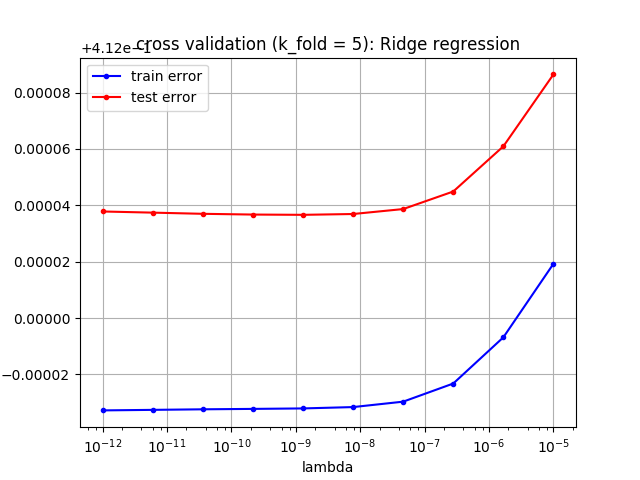

In [108]:
cross_validation_demo()   